# <center> Lista 04 - Aprendizado de Máquina </center>

**Aluno(a):** Marianna de Pinho Severo<br>
**Matrícula:** 374856<br>
**Professor(a):** Regis Pires

## 1) Criar um documento do Jupyter Notebook para criar um modelo preciso de classificação para o  Wisconsin Diagnostic Breast Cancer (WDBC) Dataset.

O dataset foi baixado de [WDBC dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data) e foi salvo no arquivo *wdbc.csv*.


## 2) Baixar e carregar os dados.
Uma vez que os dados já foram baixados, agora iremos carregá-los. Para isso, primeiramente importaremos todas as bibliotecas que serão utilizadas para essa e as outras atividades da lista.

### Passo 01: Importar bibliotecas

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics #biblioteca utilizada para extrair as métricas de desempenho do algoritmo de aprendizagem.

### Passo 02: Criar função para carregamento dos dados
DATASET_PATH é um define que indica onde o conjunto de dados está armazenado no computador. Nesse caso, está em uma pasta, chamada *dataset*, localizada dentro da pasta em que este notebook se encontra.

In [2]:
DATASET_PATH = "dataset/"

A função *load_wdbc_data* é responsável por abrir o arquivo que contém o conjunto de dados, chamado *wdbc.csv*, e retornar seus valores no formato DataFrame, que é uma estrutura de dados de duas dimensões, cujos eixos são rotulados.

In [3]:
def load_wdbc_data(dataset_path = DATASET_PATH):
    cols = ['id', 'diagnosis', 'radius_mean','texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se','texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
           'radius_worst','texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

    csv_path = os.path.join(dataset_path, "wdbc.csv")
    return pd.read_csv(csv_path, names=cols)

### Passo 03: Carregar os dados
Por fim, carregaremos o conjunto de dados dentro da variável *wdbc*, que será utilizada para a realização das próximas operações.

In [4]:
wdbc = load_wdbc_data()

## 3) Fazer uma breve análise dos dados.
Nessa etapa, utilizaremos algumas das funções apresentadas no Capítulo 02 do livro **Hands-On Machine Learning with Scikit-Learn and TensorFlow** para uma breve visualização e análise do conjunto de dados.

O conjunto de dados foi construído a partir de imagens digitalizadas de pequenas porções de massas mamárias colocadas em tubos finos. Cada linha do conjunto de dados representa uma imagem e, para cada uma delas, 30 features foram extraídas, as quais descrevem características dos núcleos celulares das massas representadas nessas imagens. As características foram: **radius**, **texture**, **perimeter**, **area**, **smoothness**, **compactness**, **concavity**, **concave_points**, **symmetry** e **fractal_dimension**. Como em uma imagem estão presentes inúmeros núcleos celulares, fez-se o cálculo da **média** (*mean*), do **erro padrão** (*se*) e da **média dos três maiores valores** (*worst*) desses núcleos com relação a cada uma das características. Assim, como são 10 características e, para cada uma, calculamos esses três parâmetros, obtivemos um conjunto de dados com 30 features. 

Dessa forma, a primeira coluna do conjunto de dados representa o **id** de cada amostra, a segunda coluna representa o **diagnosis**, as dez colunas seguintes representam as características para **mean**, as próximas dez são para **se** e as dez restantes são para **worst**.


### Passo 01: Método head()
O conjunto de dados (*dataset*) está armazenado na variável *wdbc*. Com o método *head()*, apresentamos as cinco primeiras linhas desse conjunto, em formato de tabela.

In [5]:
wdbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Passo 02: Método info()
Utilizando o método *info()*, obtemos uma descrição rápida dos dados. É possível observar que o *dataset* possui 569 linhas, sendo elas numeradas de 0 a 568; que o id é do tipo *int*, que os atributos são do tipo *float* e a classe é do tipo objeto; também é possível observar que todas as linhas estão preenchidas, o que significa que não há linhas nem colunas sem valores.

In [6]:
wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Passo 03: Método value_counts()
Utilizando o método *value_counts()*, é possível observarmos quais classes existem no conjunto de dados e quantas linhas correspondem a cada uma delas.

In [7]:
wdbc["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Nesse caso, podemos observar que temos 357 amostras cujos tumores são considerados benignos e 212 em que eles são considerados malígnos. Ou seja, os dados não estão igualmente balanceados.

### Passo 04: Método describe()
Com o método *describe()*, uma tabela com um resumo de todos os dados do *dataset* é mostrada. A linha **std** indica o *desvio padrão* dos dados. Já, as linhas **25%**, **50%** e **75%** indicam os percentis, que são valores abaixo dos quais uma determinada porcentagem de observações em um grupo recai.

In [8]:
wdbc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Passo 05: Método hist()
Utilizando o método *hist()*, podemos observar os histogramas do conjunto de dados, em que cada gráfico representa um atributo numérico, o eixo horizontal de cada gráfico representa o valor que aquele atributo possui e o eixo vertical representa quantas instâncias dos dados possuem aquele valor.

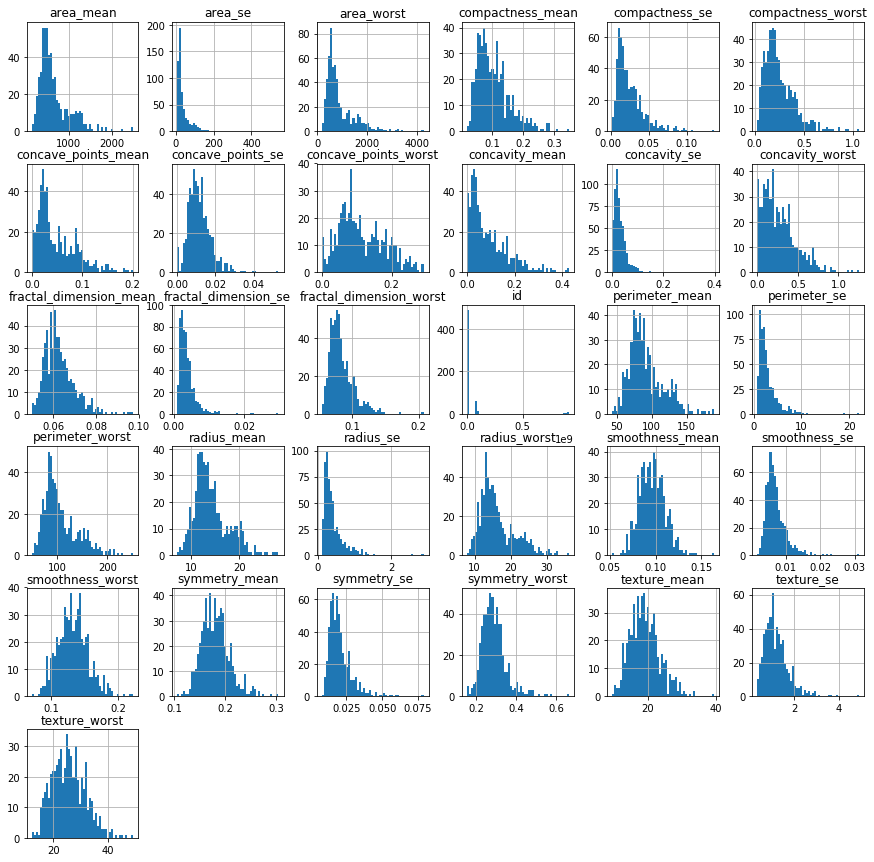

In [9]:
wdbc.hist(bins=50, figsize=(15,15))
plt.show()

### Passo 06: Método tail() 
Esse método mostra as últimas cinco linhas do conjunto de dados.

In [10]:
wdbc.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### Passo 07: Método corr()

Esse método calcula a correlação entre os atributos do conjunto de dados. Por padrão, o método de correlação empregado é o *Pearson correlation coefficient*, que é uma medida linear de correlação entre duas variáveis. Quanto mais próxima de 1, mais forte é a correlação em um sentido positivo; quanto mais próxima de -1, mais forte ela é em um sentido negativo; e, por último, quanto mais próxima de 0, menor é a correlação entre as duas variáveis consideradas.

O método *set_precision(n)* formata os valores da tabela, fazendo com que eles possuam, no máximo, **n** casas decimais. Para isso, ele arredonda os dígitos até que se chegue às n casas.

O método *background_gradient()* cria um mapa de calor (*heat map*). Para essa análise, utilizamos o padrão de cores **RdYlGn**, fazendo com que os valores mais negativos ganhem tons cada vez mais vermelhos, os valores intermediários sejam pintados com tons amarelados e os valores mais positivos ganhem tons cada vez mais verdes.

In [11]:
wdbc.corr().style.background_gradient(cmap='RdYlGn').set_precision(4)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1,0.07463,0.09977,0.07316,0.09689,-0.01297,9.57e-05,0.05008,0.04416,-0.02211,-0.05251,0.143,-0.007526,0.1373,0.1777,0.09678,0.03396,0.05524,0.07877,-0.01731,0.02573,0.08241,0.06472,0.07999,0.1072,0.01034,-0.002968,0.0232,0.03517,-0.04422,-0.02987
radius_mean,0.07463,1,0.3238,0.9979,0.9874,0.1706,0.5061,0.6768,0.8225,0.1477,-0.3116,0.6791,-0.09732,0.6742,0.7359,-0.2226,0.206,0.1942,0.3762,-0.1043,-0.04264,0.9695,0.297,0.9651,0.9411,0.1196,0.4135,0.5269,0.7442,0.164,0.007066
texture_mean,0.09977,0.3238,1,0.3295,0.3211,-0.02339,0.2367,0.3024,0.2935,0.0714,-0.07644,0.2759,0.3864,0.2817,0.2598,0.006614,0.192,0.1433,0.1639,0.009127,0.05446,0.3526,0.912,0.358,0.3435,0.0775,0.2778,0.301,0.2953,0.105,0.1192
perimeter_mean,0.07316,0.9979,0.3295,1,0.9865,0.2073,0.5569,0.7161,0.851,0.183,-0.2615,0.6918,-0.08676,0.6931,0.745,-0.2027,0.2507,0.2281,0.4072,-0.08163,-0.005523,0.9695,0.303,0.9704,0.9415,0.1505,0.4558,0.5639,0.7712,0.1891,0.05102
area_mean,0.09689,0.9874,0.3211,0.9865,1,0.177,0.4985,0.686,0.8233,0.1513,-0.2831,0.7326,-0.06628,0.7266,0.8001,-0.1668,0.2126,0.2077,0.3723,-0.0725,-0.01989,0.9627,0.2875,0.9591,0.9592,0.1235,0.3904,0.5126,0.722,0.1436,0.003738
smoothness_mean,-0.01297,0.1706,-0.02339,0.2073,0.177,1,0.6591,0.522,0.5537,0.5578,0.5848,0.3015,0.06841,0.2961,0.2466,0.3324,0.3189,0.2484,0.3807,0.2008,0.2836,0.2131,0.03607,0.2389,0.2067,0.8053,0.4725,0.4349,0.5031,0.3943,0.4993
compactness_mean,9.57e-05,0.5061,0.2367,0.5569,0.4985,0.6591,1,0.8831,0.8311,0.6026,0.5654,0.4975,0.0462,0.5489,0.4557,0.1353,0.7387,0.5705,0.6423,0.23,0.5073,0.5353,0.2481,0.5902,0.5096,0.5655,0.8658,0.8163,0.8156,0.5102,0.6874
concavity_mean,0.05008,0.6768,0.3024,0.7161,0.686,0.522,0.8831,1,0.9214,0.5007,0.3368,0.6319,0.07622,0.6604,0.6174,0.09856,0.6703,0.6913,0.6833,0.178,0.4493,0.6882,0.2999,0.7296,0.676,0.4488,0.755,0.8841,0.8613,0.4095,0.5149
concave_points_mean,0.04416,0.8225,0.2935,0.851,0.8233,0.5537,0.8311,0.9214,1,0.4625,0.1669,0.698,0.02148,0.7106,0.6903,0.02765,0.4904,0.4392,0.6156,0.09535,0.2576,0.8303,0.2928,0.8559,0.8096,0.4528,0.6675,0.7524,0.9102,0.3757,0.3687
symmetry_mean,-0.02211,0.1477,0.0714,0.183,0.1513,0.5578,0.6026,0.5007,0.4625,1,0.4799,0.3034,0.1281,0.3139,0.224,0.1873,0.4217,0.3426,0.3933,0.4491,0.3318,0.1857,0.09065,0.2192,0.1772,0.4267,0.4732,0.4337,0.4303,0.6998,0.4384


## 4) Separar parte dos dados para treino (70%) e parte para teste (30%).

### Passo 01: Mapear labels para números

Os *labels* do nosso conjunto de dados estão no formato texto, que é humanamente legível. Entretanto, para que possamos utilizar os algoritmos de aprendizado requisitados, precisamos transformar esses textos para um formato de representação que os algoritmos entendam. Nesse caso, esse formato são números. Como os algoritmos empregados são binários (sua saída só possui dois valores possíveis), mapearemos as duas classes para 1 (B) e -1 (M).

In [12]:
wdbc["diagnosis"] = np.where(wdbc["diagnosis"] == "M", 1, -1)

### Passo 03: Extrair os valores
Agora, extrairemos os valores contidos na estrutura *wdbc*, que é do tipo *DataFrame*. Para isso, utilizaremos o atributo *values*, que retorna uma estrutura NumPy que contém os dados existentes na estrutura *wdbc*,  retirando-se os nomes dos eixos, e a salvaremos na estrutura  **dataset**.

In [13]:
dataset = wdbc.values

### Passo 04: Tornar os dados aleatórios
Como separaremos os dados em um conjunto de treino e um de teste, é importante que o conjunto de treino tenha dados de todas as classes. Portanto, reorganizando as linhas de forma aleatória, garantiremos que esse conjunto tenha acesso aos dados desejados. Para isso, utilizaremos os métodos **random.seed()** e **random.shuffle()**.

In [14]:
np.random.seed(1)
np.random.shuffle(dataset)

### Passo 05: Separar *features* e *lables*
Agora, salvaremos na estrutura X todas as características que serão utilizadas pelo algoritmo de aprendizado para realizar classificação. Elas podem ser entendidas como a entrada do sistema. Então, salvaremos na estrutura Y todos os lables, que, neste caso, são classes do conjunto de dados. Eles podem ser entendidos como a saída do sistema e correspondem aos valores que o algoritmo dever prever, ou classificar, de acordo com a entrada recebida.

In [15]:
X = dataset[:,2:]
y = dataset[:,1]

### Passo 06: Criação dos conjuntos de treino e de teste
Por fim, criaremos os conjuntos de treino e teste, salvando, nas estruturas **X_train** e **y_train**, 70% dos dados e, nas estruturas **X_test** e **y_test**, os 30% restantes. Nas estruturas que começam com *X_* estão os dados de entrada e nas que começam com *y_*, os de saída.

In [16]:
n_train = int(round(len(y) * 0.70))
X_train = X[:n_train,:]
y_train = y[:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]

## 5) Criar modelos de aprendizado de máquina usando os seguintes algoritmos:

### Passo 01: Perceptron da Lista 03
O Perceptron é um modelo de aprendizado binário, ou seja, sua saída só possui dois valores possíveis. Entretanto, com algumas adaptações, ele pode ser empregado para modelos de aprendizado em que se deseja mais de dois valores de saída. Seus hiperparâmetros são a **taxa de aprendizado**(*eta*) e o **número de epochs**(*n_iter*).

In [17]:
class Perceptron_Lista3(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [18]:
perceptron_lista3_model = Perceptron_Lista3(eta=0.00001, n_iter=20)

In [19]:
perceptron_lista3_model.fit(X_train, y_train)

In [20]:
pl3_pred = perceptron_lista3_model.predict(X_test)
metrics.accuracy_score(y_test, pl3_pred)

0.9181286549707602

### Passo 02: Criar Adaline com Gradiente Descendente da Lista 03
O Adaline é um modelo de aprendizado baseado no Perceptron. Suas principais diferenças são o fato de a função de ativação do Adaline ser uma função linear (nesse caso, identidade), ao invés de uma função de passo unitário; o Adaline também possui uma função de limite, a qual funciona como um passo unitário, que recebe a saída da função de ativação e apresenta o valor final do algoritmo como um de dois valores; além disso, ao contrário do que acontece no Perceptron, todo o conjunto de treino é utilizado, de uma vez, antes de os pesos serem atualizados; para que os pesos sejam atualizados, a saída da função de ativação, e não da saída final do algoritmo, é utilizada para o cálculo do erro; por fim, a atualização dos pesos depende de um algoritmo chamado de *Gradient Descent*, que é dado pela derivada parcial da função de custo, para cada peso do modelo. O *Gradient Descent* é empregado para minimizar a **Função de Custo**, que é empregada para o ajuste dos pesos. A mudança final a ser realizada em um determinado peso é dada pela taxa de aprendizado do algoritmo multiplicada pelo negativo do gradient descent. 

Seus hiperparâmetros são a **taxa de aprendizado** (*eta*) e o **número de epochs** (*n_iter*).

In [21]:
class AdalineGD_Lista3(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
       
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        #Como estamos calculando o net_input para todas as linhas do conjunto de dados, teremos n_trains elementos
        #retornados
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [22]:
adalineGD_lista3_model = AdalineGD_Lista3(n_iter=23)

Para valores de n_iter > 23, w e error estão assumindo valores **inf** e **nan**. Não entendi o porquê. 

In [23]:
adalineGD_lista3_model.fit(X_train, y_train)

In [24]:
agdl3_pred = adalineGD_lista3_model.predict(X_test)
metrics.accuracy_score(y_test, agdl3_pred)

0.631578947368421

### Passo 03: Adaline com Gradiente Descendente Estocástico
Este algoritmo é semelhante ao Adaline com Gradiente Descendente. Entretanto, ao invés de atualizarmos os pesos utilizando todo o conjunto de treino, atualizamos eles a cada amostra. Isso ajuda tanto a minimizarmos a função de custo mais rapidamente, como a trabalharmos com grandes quantidades de dados que exigiriam grande poder computacional caso fossem utilizados de uma vez. Esse algoritmo também pode ser utilizado para aprendizado online, em que ele é treinado conforme novos dados chegam.

In [25]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [26]:
adalineSGD_model = AdalineSGD(n_iter = 1)

In [27]:
adalineSGD_model.fit(X_train, y_train)

/home/marianna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: overflow encountered in double_scalars
/home/marianna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in add
/home/marianna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in double_scalars


In [28]:
pred = adalineSGD_model.predict(X_test)
metrics.accuracy_score(y_test, pred)

/home/marianna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in greater_equal


0.631578947368421

Os valores de peso e erro estão crescendo ou diminuindo muito rapidamente. Em determinado momento, eles se toran **inf** ou **nan**. Não estou entendendo por que isso ocorre.

### Passo 04: Adaline com Gradiente Descendente Estocástico usando mini-batches de 20 elementos

In [29]:
class AdalineSGD_Batch(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def online_fit(self, X, y, n):
        ''' n: is the width of the mini-batch'''
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for i in range(len(y)):
                self.partial_fit(X[i:i+n], y[i:i+n])
                print("X:", X[i:i+n])
                print("Y:", y[i:i+n])
                i=i+n
                
                
            avg_cost = sum(cos)/len(y)
            self.cost_.append(avg_cost)
        return self
                  
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        cost = []
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
        else:
            cost.append(self._update_weights(X, y))
        return self,cost

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [30]:
adaline_batch = AdalineSGD_Batch(n_iter = 1)

In [31]:
adaline_batch.online_fit(X_train, y_train, 20)
pred = adaline_batch.predict(X_test)

X: [[1.362e+01 2.323e+01 8.719e+01 5.732e+02 9.246e-02 6.747e-02 2.974e-02
  2.443e-02 1.664e-01 5.801e-02 3.460e-01 1.336e+00 2.066e+00 3.124e+01
  5.868e-03 2.099e-02 2.021e-02 9.064e-03 2.087e-02 2.583e-03 1.535e+01
  2.909e+01 9.758e+01 7.298e+02 1.216e-01 1.517e-01 1.049e-01 7.174e-02
  2.642e-01 6.953e-02]
 [1.193e+01 2.153e+01 7.653e+01 4.386e+02 9.768e-02 7.849e-02 3.328e-02
  2.008e-02 1.688e-01 6.194e-02 3.118e-01 9.227e-01 2.000e+00 2.479e+01
  7.803e-03 2.507e-02 1.835e-02 7.711e-03 1.278e-02 3.856e-03 1.367e+01
  2.615e+01 8.754e+01 5.830e+02 1.500e-01 2.399e-01 1.503e-01 7.247e-02
  2.438e-01 8.541e-02]
 [1.216e+01 1.803e+01 7.829e+01 4.553e+02 9.087e-02 7.838e-02 2.916e-02
  1.527e-02 1.464e-01 6.284e-02 2.194e-01 1.190e+00 1.678e+00 1.626e+01
  4.911e-03 1.666e-02 1.397e-02 5.161e-03 1.454e-02 1.858e-03 1.334e+01
  2.787e+01 8.883e+01 5.474e+02 1.208e-01 2.279e-01 1.620e-01 5.690e-02
  2.406e-01 7.729e-02]
 [9.000e+00 1.440e+01 5.636e+01 2.463e+02 7.005e-02 3.116e-02 3.

/home/marianna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: overflow encountered in double_scalars
/home/marianna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in add
/home/marianna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in double_scalars


[[9.465e+00 2.101e+01 6.011e+01 2.694e+02 1.044e-01 7.773e-02 2.172e-02
  1.504e-02 1.717e-01 6.899e-02 2.351e-01 2.011e+00 1.660e+00 1.420e+01
  1.052e-02 1.755e-02 1.714e-02 9.333e-03 2.279e-02 4.237e-03 1.041e+01
  3.156e+01 6.703e+01 3.307e+02 1.548e-01 1.664e-01 9.412e-02 6.517e-02
  2.878e-01 9.211e-02]
 [1.291e+01 1.633e+01 8.253e+01 5.164e+02 7.941e-02 5.366e-02 3.873e-02
  2.377e-02 1.829e-01 5.667e-02 1.942e-01 9.086e-01 1.493e+00 1.575e+01
  5.298e-03 1.587e-02 2.321e-02 8.420e-03 1.853e-02 2.152e-03 1.388e+01
  2.200e+01 9.081e+01 6.006e+02 1.097e-01 1.506e-01 1.764e-01 8.235e-02
  3.024e-01 6.949e-02]
 [1.176e+01 2.160e+01 7.472e+01 4.279e+02 8.637e-02 4.966e-02 1.657e-02
  1.115e-02 1.495e-01 5.888e-02 4.062e-01 1.210e+00 2.635e+00 2.847e+01
  5.857e-03 9.758e-03 1.168e-02 7.445e-03 2.406e-02 1.769e-03 1.298e+01
  2.572e+01 8.298e+01 5.165e+02 1.085e-01 8.615e-02 5.523e-02 3.715e-02
  2.433e-01 6.563e-02]
 [1.066e+01 1.515e+01 6.749e+01 3.496e+02 8.792e-02 4.302e-02 0.000

  2.272e-01 8.799e-02]]
Y: [-1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1.
 -1. -1.]
X: [[1.164e+01 1.833e+01 7.517e+01 4.125e+02 1.142e-01 1.017e-01 7.070e-02
  3.485e-02 1.801e-01 6.520e-02 3.060e-01 1.657e+00 2.155e+00 2.062e+01
  8.540e-03 2.310e-02 2.945e-02 1.398e-02 1.565e-02 3.840e-03 1.314e+01
  2.926e+01 8.551e+01 5.217e+02 1.688e-01 2.660e-01 2.873e-01 1.218e-01
  2.806e-01 9.097e-02]
 [1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
  8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
  7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
  2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
  3.985e-01 1.244e-01]
 [1.462e+01 2.402e+01 9.457e+01 6.627e+02 8.974e-02 8.606e-02 3.102e-02
  2.957e-02 1.685e-01 5.866e-02 3.721e-01 1.111e+00 2.279e+00 3.376e+01
  4.868e-03 1.818e-02 1.121e-02 8.606e-03 2.085e-02 2.893e-03 1.611e+01
  2.911e+01 1.029e+02 8.037e+02 1.115e-01 1.766e-

X: [[1.405e+01 2.715e+01 9.138e+01 6.004e+02 9.929e-02 1.126e-01 4.462e-02
  4.304e-02 1.537e-01 6.171e-02 3.645e-01 1.492e+00 2.888e+00 2.984e+01
  7.256e-03 2.678e-02 2.071e-02 1.626e-02 2.080e-02 5.304e-03 1.530e+01
  3.317e+01 1.002e+02 7.067e+02 1.241e-01 2.264e-01 1.326e-01 1.048e-01
  2.250e-01 8.321e-02]
 [1.546e+01 1.948e+01 1.017e+02 7.489e+02 1.092e-01 1.223e-01 1.466e-01
  8.087e-02 1.931e-01 5.796e-02 4.743e-01 7.859e-01 3.094e+00 4.831e+01
  6.240e-03 1.484e-02 2.813e-02 1.093e-02 1.397e-02 2.461e-03 1.926e+01
  2.600e+01 1.249e+02 1.156e+03 1.546e-01 2.394e-01 3.791e-01 1.514e-01
  2.837e-01 8.019e-02]
 [2.073e+01 3.112e+01 1.357e+02 1.419e+03 9.469e-02 1.143e-01 1.367e-01
  8.646e-02 1.769e-01 5.674e-02 1.172e+00 1.617e+00 7.749e+00 1.997e+02
  4.551e-03 1.478e-02 2.143e-02 9.280e-03 1.367e-02 2.299e-03 3.249e+01
  4.716e+01 2.140e+02 3.432e+03 1.401e-01 2.644e-01 3.442e-01 1.659e-01
  2.868e-01 8.218e-02]
 [1.254e+01 1.807e+01 7.942e+01 4.919e+02 7.436e-02 2.650e-02 1.

X: [[1.287e+01 1.621e+01 8.238e+01 5.122e+02 9.425e-02 6.219e-02 3.900e-02
  1.615e-02 2.010e-01 5.769e-02 2.345e-01 1.219e+00 1.546e+00 1.824e+01
  5.518e-03 2.178e-02 2.589e-02 6.330e-03 2.593e-02 2.157e-03 1.390e+01
  2.364e+01 8.927e+01 5.975e+02 1.256e-01 1.808e-01 1.992e-01 5.780e-02
  3.604e-01 7.062e-02]
 [1.127e+01 1.550e+01 7.338e+01 3.920e+02 8.365e-02 1.114e-01 1.007e-01
  2.757e-02 1.810e-01 7.252e-02 3.305e-01 1.067e+00 2.569e+00 2.297e+01
  1.038e-02 6.669e-02 9.472e-02 2.047e-02 1.219e-02 1.233e-02 1.204e+01
  1.893e+01 7.973e+01 4.500e+02 1.102e-01 2.809e-01 3.021e-01 8.272e-02
  2.157e-01 1.043e-01]
 [1.981e+01 2.215e+01 1.300e+02 1.260e+03 9.831e-02 1.027e-01 1.479e-01
  9.498e-02 1.582e-01 5.395e-02 7.582e-01 1.017e+00 5.865e+00 1.124e+02
  6.494e-03 1.893e-02 3.391e-02 1.521e-02 1.356e-02 1.997e-03 2.732e+01
  3.088e+01 1.868e+02 2.398e+03 1.512e-01 3.150e-01 5.372e-01 2.388e-01
  2.768e-01 7.615e-02]
 [1.919e+01 1.594e+01 1.263e+02 1.157e+03 8.694e-02 1.185e-01 1.

X: [[1.206e+01 1.890e+01 7.666e+01 4.453e+02 8.386e-02 5.794e-02 7.510e-03
  8.488e-03 1.555e-01 6.048e-02 2.430e-01 1.152e+00 1.559e+00 1.802e+01
  7.180e-03 1.096e-02 5.832e-03 5.495e-03 1.982e-02 2.754e-03 1.364e+01
  2.706e+01 8.654e+01 5.626e+02 1.289e-01 1.352e-01 4.506e-02 5.093e-02
  2.880e-01 8.083e-02]
 [9.847e+00 1.568e+01 6.300e+01 2.932e+02 9.492e-02 8.419e-02 2.330e-02
  2.416e-02 1.387e-01 6.891e-02 2.498e-01 1.216e+00 1.976e+00 1.524e+01
  8.732e-03 2.042e-02 1.062e-02 6.801e-03 1.824e-02 3.494e-03 1.124e+01
  2.299e+01 7.432e+01 3.765e+02 1.419e-01 2.243e-01 8.434e-02 6.528e-02
  2.502e-01 9.209e-02]
 [9.423e+00 2.788e+01 5.926e+01 2.713e+02 8.123e-02 4.971e-02 0.000e+00
  0.000e+00 1.742e-01 6.059e-02 5.375e-01 2.927e+00 3.618e+00 2.911e+01
  1.159e-02 1.124e-02 0.000e+00 0.000e+00 3.004e-02 3.324e-03 1.049e+01
  3.424e+01 6.650e+01 3.306e+02 1.073e-01 7.158e-02 0.000e+00 0.000e+00
  2.475e-01 6.969e-02]
 [1.426e+01 1.965e+01 9.783e+01 6.299e+02 7.837e-02 2.233e-01 3.

X: [[2.026e+01 2.303e+01 1.324e+02 1.264e+03 9.078e-02 1.313e-01 1.465e-01
  8.683e-02 2.095e-01 5.649e-02 7.576e-01 1.509e+00 4.554e+00 8.787e+01
  6.016e-03 3.482e-02 4.232e-02 1.269e-02 2.657e-02 4.411e-03 2.422e+01
  3.159e+01 1.561e+02 1.750e+03 1.190e-01 3.539e-01 4.098e-01 1.573e-01
  3.689e-01 8.368e-02]
 [1.460e+01 2.329e+01 9.397e+01 6.647e+02 8.682e-02 6.636e-02 8.390e-02
  5.271e-02 1.627e-01 5.416e-02 4.157e-01 1.627e+00 2.914e+00 3.301e+01
  8.312e-03 1.742e-02 3.389e-02 1.576e-02 1.740e-02 2.871e-03 1.579e+01
  3.171e+01 1.022e+02 7.582e+02 1.312e-01 1.581e-01 2.675e-01 1.359e-01
  2.477e-01 6.836e-02]
 [1.337e+01 1.639e+01 8.610e+01 5.535e+02 7.115e-02 7.325e-02 8.092e-02
  2.800e-02 1.422e-01 5.823e-02 1.639e-01 1.140e+00 1.223e+00 1.466e+01
  5.919e-03 3.270e-02 4.957e-02 1.038e-02 1.208e-02 4.076e-03 1.426e+01
  2.275e+01 9.199e+01 6.321e+02 1.025e-01 2.531e-01 3.308e-01 8.978e-02
  2.048e-01 7.628e-02]
 [1.377e+01 1.327e+01 8.806e+01 5.827e+02 9.198e-02 6.221e-02 1.

X: [[1.674e+01 2.159e+01 1.101e+02 8.695e+02 9.610e-02 1.336e-01 1.348e-01
  6.018e-02 1.896e-01 5.656e-02 4.615e-01 9.197e-01 3.008e+00 4.519e+01
  5.776e-03 2.499e-02 3.695e-02 1.195e-02 2.789e-02 2.665e-03 2.001e+01
  2.902e+01 1.335e+02 1.229e+03 1.563e-01 3.835e-01 5.409e-01 1.813e-01
  4.863e-01 8.633e-02]
 [1.775e+01 2.803e+01 1.173e+02 9.816e+02 9.997e-02 1.314e-01 1.698e-01
  8.293e-02 1.713e-01 5.916e-02 3.897e-01 1.077e+00 2.873e+00 4.395e+01
  4.714e-03 2.015e-02 3.697e-02 1.110e-02 1.237e-02 2.556e-03 2.153e+01
  3.854e+01 1.454e+02 1.437e+03 1.401e-01 3.762e-01 6.399e-01 1.970e-01
  2.972e-01 9.075e-02]
 [1.573e+01 1.128e+01 1.028e+02 7.472e+02 1.043e-01 1.299e-01 1.191e-01
  6.211e-02 1.784e-01 6.259e-02 1.630e-01 3.871e-01 1.143e+00 1.387e+01
  6.034e-03 1.820e-02 3.336e-02 1.067e-02 1.175e-02 2.256e-03 1.701e+01
  1.420e+01 1.125e+02 8.543e+02 1.541e-01 2.979e-01 4.004e-01 1.452e-01
  2.557e-01 8.181e-02]
 [1.230e+01 1.902e+01 7.788e+01 4.644e+02 8.313e-02 4.202e-02 7.

  2.505e-01 6.431e-02]]
Y: [-1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1.
  1. -1.]
X: [[1.090e+01 1.296e+01 6.869e+01 3.668e+02 7.515e-02 3.718e-02 3.090e-03
  6.588e-03 1.442e-01 5.743e-02 2.818e-01 7.614e-01 1.808e+00 1.854e+01
  6.142e-03 6.134e-03 1.835e-03 3.576e-03 1.637e-02 2.665e-03 1.236e+01
  1.820e+01 7.807e+01 4.700e+02 1.171e-01 8.294e-02 1.854e-02 3.953e-02
  2.738e-01 7.685e-02]
 [1.029e+01 2.761e+01 6.567e+01 3.214e+02 9.030e-02 7.658e-02 5.999e-02
  2.738e-02 1.593e-01 6.127e-02 2.199e-01 2.239e+00 1.437e+00 1.446e+01
  1.205e-02 2.736e-02 4.804e-02 1.721e-02 1.843e-02 4.938e-03 1.084e+01
  3.491e+01 6.957e+01 3.576e+02 1.384e-01 1.710e-01 2.000e-01 9.127e-02
  2.226e-01 8.283e-02]
 [8.196e+00 1.684e+01 5.171e+01 2.019e+02 8.600e-02 5.943e-02 1.588e-02
  5.917e-03 1.769e-01 6.503e-02 1.563e-01 9.567e-01 1.094e+00 8.205e+00
  8.968e-03 1.646e-02 1.588e-02 5.917e-03 2.574e-02 2.582e-03 8.964e+00
  2.196e+01 5.726e+01 2.422e+02 1.297e-01 1.357e-

X: [[2.321e+01 2.697e+01 1.535e+02 1.670e+03 9.509e-02 1.682e-01 1.950e-01
  1.237e-01 1.909e-01 6.309e-02 1.058e+00 9.635e-01 7.247e+00 1.558e+02
  6.428e-03 2.863e-02 4.497e-02 1.716e-02 1.590e-02 3.053e-03 3.101e+01
  3.451e+01 2.060e+02 2.944e+03 1.481e-01 4.126e-01 5.820e-01 2.593e-01
  3.103e-01 8.677e-02]
 [1.128e+01 1.339e+01 7.300e+01 3.848e+02 1.164e-01 1.136e-01 4.635e-02
  4.796e-02 1.771e-01 6.072e-02 3.384e-01 1.343e+00 1.851e+00 2.633e+01
  1.127e-02 3.498e-02 2.187e-02 1.965e-02 1.580e-02 3.442e-03 1.192e+01
  1.577e+01 7.653e+01 4.340e+02 1.367e-01 1.822e-01 8.669e-02 8.611e-02
  2.102e-01 6.784e-02]
 [1.575e+01 1.922e+01 1.071e+02 7.586e+02 1.243e-01 2.364e-01 2.914e-01
  1.242e-01 2.375e-01 7.603e-02 5.204e-01 1.324e+00 3.477e+00 5.122e+01
  9.329e-03 6.559e-02 9.953e-02 2.283e-02 5.543e-02 7.330e-03 1.736e+01
  2.417e+01 1.194e+02 9.153e+02 1.550e-01 5.046e-01 6.872e-01 2.135e-01
  4.245e-01 1.050e-01]
 [1.272e+01 1.378e+01 8.178e+01 4.921e+02 9.667e-02 8.393e-02 1.

X: [[1.221e+01 1.409e+01 7.878e+01 4.620e+02 8.108e-02 7.823e-02 6.839e-02
  2.534e-02 1.646e-01 6.154e-02 2.666e-01 8.309e-01 2.097e+00 1.996e+01
  4.405e-03 3.026e-02 4.344e-02 1.087e-02 1.921e-02 4.622e-03 1.313e+01
  1.929e+01 8.765e+01 5.299e+02 1.026e-01 2.431e-01 3.076e-01 9.140e-02
  2.677e-01 8.824e-02]
 [1.051e+01 2.019e+01 6.864e+01 3.342e+02 1.122e-01 1.303e-01 6.476e-02
  3.068e-02 1.922e-01 7.782e-02 3.336e-01 1.860e+00 2.041e+00 1.991e+01
  1.188e-02 3.747e-02 4.591e-02 1.544e-02 2.287e-02 6.792e-03 1.116e+01
  2.275e+01 7.262e+01 3.744e+02 1.300e-01 2.049e-01 1.295e-01 6.136e-02
  2.383e-01 9.026e-02]
 [1.566e+01 2.320e+01 1.102e+02 7.735e+02 1.109e-01 3.114e-01 3.176e-01
  1.377e-01 2.495e-01 8.104e-02 1.292e+00 2.454e+00 1.012e+01 1.385e+02
  1.236e-02 5.995e-02 8.232e-02 3.024e-02 2.337e-02 6.042e-03 1.985e+01
  3.164e+01 1.437e+02 1.226e+03 1.504e-01 5.172e-01 6.181e-01 2.462e-01
  3.277e-01 1.019e-01]
 [1.157e+01 1.904e+01 7.420e+01 4.097e+02 8.546e-02 7.722e-02 5.

X: [[1.190e+01 1.465e+01 7.811e+01 4.328e+02 1.152e-01 1.296e-01 3.710e-02
  3.003e-02 1.995e-01 7.839e-02 3.962e-01 6.538e-01 3.021e+00 2.503e+01
  1.017e-02 4.741e-02 2.789e-02 1.110e-02 3.127e-02 9.423e-03 1.315e+01
  1.651e+01 8.626e+01 5.096e+02 1.424e-01 2.517e-01 9.420e-02 6.042e-02
  2.727e-01 1.036e-01]
 [1.822e+01 1.870e+01 1.203e+02 1.033e+03 1.148e-01 1.485e-01 1.772e-01
  1.060e-01 2.092e-01 6.310e-02 8.337e-01 1.593e+00 4.877e+00 9.881e+01
  3.899e-03 2.961e-02 2.817e-02 9.222e-03 2.674e-02 5.126e-03 2.060e+01
  2.413e+01 1.351e+02 1.321e+03 1.280e-01 2.297e-01 2.623e-01 1.325e-01
  3.021e-01 7.987e-02]
 [2.116e+01 2.304e+01 1.372e+02 1.404e+03 9.428e-02 1.022e-01 1.097e-01
  8.632e-02 1.769e-01 5.278e-02 6.917e-01 1.127e+00 4.303e+00 9.399e+01
  4.728e-03 1.259e-02 1.715e-02 1.038e-02 1.083e-02 1.987e-03 2.917e+01
  3.559e+01 1.880e+02 2.615e+03 1.401e-01 2.600e-01 3.155e-01 2.009e-01
  2.822e-01 7.526e-02]
 [2.094e+01 2.356e+01 1.389e+02 1.364e+03 1.007e-01 1.606e-01 2.

X: [[2.092e+01 2.509e+01 1.430e+02 1.347e+03 1.099e-01 2.236e-01 3.174e-01
  1.474e-01 2.149e-01 6.879e-02 9.622e-01 1.026e+00 8.758e+00 1.188e+02
  6.399e-03 4.310e-02 7.845e-02 2.624e-02 2.057e-02 6.213e-03 2.429e+01
  2.941e+01 1.791e+02 1.819e+03 1.407e-01 4.186e-01 6.599e-01 2.542e-01
  2.929e-01 9.873e-02]
 [2.048e+01 2.146e+01 1.325e+02 1.306e+03 8.355e-02 8.348e-02 9.042e-02
  6.022e-02 1.467e-01 5.177e-02 6.874e-01 1.041e+00 5.144e+00 8.350e+01
  7.959e-03 3.133e-02 4.257e-02 1.671e-02 1.341e-02 3.933e-03 2.422e+01
  2.617e+01 1.617e+02 1.750e+03 1.228e-01 2.311e-01 3.158e-01 1.445e-01
  2.238e-01 7.127e-02]
 [1.161e+01 1.602e+01 7.546e+01 4.082e+02 1.088e-01 1.168e-01 7.097e-02
  4.497e-02 1.886e-01 6.320e-02 2.456e-01 7.339e-01 1.667e+00 1.589e+01
  5.884e-03 2.005e-02 2.631e-02 1.304e-02 1.848e-02 1.982e-03 1.264e+01
  1.967e+01 8.193e+01 4.757e+02 1.415e-01 2.170e-01 2.302e-01 1.105e-01
  2.787e-01 7.427e-02]
 [1.447e+01 2.499e+01 9.581e+01 6.564e+02 8.837e-02 1.230e-01 1.

X: [[1.398e+01 1.962e+01 9.112e+01 5.995e+02 1.060e-01 1.133e-01 1.126e-01
  6.463e-02 1.669e-01 6.544e-02 2.208e-01 9.533e-01 1.602e+00 1.885e+01
  5.314e-03 1.791e-02 2.185e-02 9.567e-03 1.223e-02 2.846e-03 1.704e+01
  3.080e+01 1.139e+02 8.693e+02 1.613e-01 3.568e-01 4.069e-01 1.827e-01
  3.179e-01 1.055e-01]
 [1.487e+01 2.021e+01 9.612e+01 6.809e+02 9.587e-02 8.345e-02 6.824e-02
  4.951e-02 1.487e-01 5.748e-02 2.323e-01 1.636e+00 1.596e+00 2.184e+01
  5.415e-03 1.371e-02 2.153e-02 1.183e-02 1.959e-02 1.812e-03 1.601e+01
  2.848e+01 1.039e+02 7.836e+02 1.216e-01 1.388e-01 1.700e-01 1.017e-01
  2.369e-01 6.599e-02]
 [1.665e+01 2.138e+01 1.100e+02 9.046e+02 1.121e-01 1.457e-01 1.525e-01
  9.170e-02 1.995e-01 6.330e-02 8.068e-01 9.017e-01 5.455e+00 1.026e+02
  6.048e-03 1.882e-02 2.741e-02 1.130e-02 1.468e-02 2.801e-03 2.646e+01
  3.156e+01 1.770e+02 2.215e+03 1.805e-01 3.578e-01 4.695e-01 2.095e-01
  3.613e-01 9.564e-02]
 [1.445e+01 2.022e+01 9.449e+01 6.427e+02 9.872e-02 1.206e-01 1.

ValueError: shapes (1,30) and (1,) not aligned: 30 (dim 1) != 1 (dim 0)

### Passo 05: Perceptron do Scikit Learn
Para utilizarmos o Perceptron implementado pela Scikit Learn, precisamos importá-lo a partir da biblioteca em que ele se encontra. 

In [ ]:
from sklearn.linear_model import Perceptron

Como o Perceptron é uma classe, para criarmos o modelo precisamos criar uma instância do Perceptron.

In [ ]:
perceptron_scikit_model = Perceptron(max_iter = 23)

In [ ]:
perceptron_scikit_model.fit(X_train, y_train)

In [ ]:
pscikit_pred = perceptron_scikit_model.predict(X_test)

### Passo 06: Stochastic Gradient Descent (SGD) do Scikit Learn
Assim como para o Perceptron, importaremos a classe que implementa esse algoritmo.

In [ ]:
from sklearn.linear_model import SGDClassifier

Agora, criaremos a instância do modelo.

In [ ]:
SGDC_model = SGDClassifier(n_iter = 23)

In [ ]:
SGDC_model.fit(X_train, y_train)

In [ ]:
sgsc_scikit_pred = SGDC_model.predict(X_test)

### Passo 07: Logistic Regression do Scikit Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

E, agora, criaremos sua instância.

In [ ]:
logreg_model = LogisticRegression()

In [ ]:
logreg_model.fit(X_train, y_train)

In [ ]:
logreg_pred = logreg_model.predict(X_test)

## 6) Comparar os resultados obtidos entre os algoritmos acima usando a métrica acurácia.

### Perceptron Lista 3

In [ ]:
pl3_accuracy = metrics.accuracy_score(y_test, pl3_pred)
pl3_accuracy

### Adaline Lista 3

In [ ]:
agdl3_accuracy = metrics.accuracy_score(y_test, agdl3_pred)
agdl3_accuracy

### AdalineSGD Implementado
Não consegui usar esse algoritmo, porque os valores de **w** e **error**, a partir de determinado momento, assumiram valores **inf** e **nan**.

### AdalineSGD por mini-batch Implementado
Não consegui usar esse algoritmo, porque os valores de **w** e **error**, a partir de determinado momento, assumiram valores **inf** e **nan**.

### Perceptron Scikit learn

In [ ]:
pscikit_accuracy = metrics.accuracy_score(y_test, pscikit_pred)
pscikit_accuracy

### AdalineSGD Scikit Learn

In [ ]:
sgsc_scikit_accuracy = metrics.accuracy_score(y_test, sgsc_scikit_pred)
sgsc_scikit_accuracy

### Regressão Logística Scikit Learn

In [ ]:
sgsc_scikit_accuracy = metrics.accuracy_score(y_test, sgsc_scikit_pred)
sgsc_scikit_accuracy

Dos algoritmos utilizados, o que apresentou maior acurácia foi o perceptron implementado na lista 3.